In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
bankloan=pd.read_csv('bankloan.csv')
print(bankloan)

      SN  AGE  EMPLOY  ADDRESS  DEBTINC  CREDDEBT  OTHDEBT  DEFAULTER
0      1    3      17       12      9.3     11.36     5.01          1
1      2    1      10        6     17.3      1.36     4.00          0
2      3    2      15       14      5.5      0.86     2.17          0
3      4    3      15       14      2.9      2.66     0.82          0
4      5    1       2        0     17.3      1.79     3.06          1
..   ...  ...     ...      ...      ...       ...      ...        ...
695  696    2       6       15      4.6      0.26     0.98          1
696  697    1       6        4     11.5      0.37     2.05          0
697  698    2      15        3      7.6      0.49     1.94          0
698  699    3      19       22      8.4      2.30     4.17          0
699  700    2      12       14     14.7      2.99     3.47          0

[700 rows x 8 columns]


In [10]:
bankloan['AGE']=bankloan['AGE'].astype('category')

bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SN         700 non-null    int64   
 1   AGE        700 non-null    category
 2   EMPLOY     700 non-null    int64   
 3   ADDRESS    700 non-null    int64   
 4   DEBTINC    700 non-null    float64 
 5   CREDDEBT   700 non-null    float64 
 6   OTHDEBT    700 non-null    float64 
 7   DEFAULTER  700 non-null    int64   
dtypes: category(1), float64(3), int64(4)
memory usage: 39.2 KB


In [11]:
riskmodel = smf.logit(formula = 'DEFAULTER ~ AGE + EMPLOY + ADDRESS + DEBTINC + CREDDEBT + OTHDEBT', data = bankloan).fit()

Optimization terminated successfully.
         Current function value: 0.395291
         Iterations 7


In [12]:
X = bankloan[['AGE', 'EMPLOY', 'ADDRESS', 'DEBTINC', 'CREDDEBT', 'OTHDEBT']]
X = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Feature        VIF
0     const  11.051049
1       AGE   1.770665
2    EMPLOY   1.772242
3   ADDRESS   1.443851
4   DEBTINC   1.960974
5  CREDDEBT   1.938673
6   OTHDEBT   2.364779


In [13]:
riskmodel = smf.logit(formula = 'DEFAULTER ~  EMPLOY + ADDRESS + DEBTINC + CREDDEBT', data = bankloan).fit()

riskmodel.summary()

Optimization terminated successfully.
         Current function value: 0.397671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.3079
Time:                        19:31:37   Log-Likelihood:                -278.37
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.114e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7911      0.252     -3.145      0.002      -1.284      -0.298
EMPLOY        -0.2426      0.028     -8.646      0.000      -0.298      -0.188
ADDRESS       -0.0812      0.020     -4.144      0.000      -0.120      -0.043
DEBTINC        0.0883      0.019      4.760      0.000       0.052       0.125
CREDDEBT       0.5729      0.087      6.566      0.000       0.402       0.744
==============================================================================
"""

In [14]:
bankloan['Pred'] = riskmodel.predict()
bankloan.head()

,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,Pred
0,1,3,17,12,9.3,11.36,5.01,1,0.808347
1,2,1,10,6,17.3,1.36,4.00,0,0.198115
2,3,2,15,14,5.5,0.86,2.17,0,0.010063
3,4,3,15,14,2.9,2.66,0.82,0,0.022160
4,5,1,2,0,17.3,1.79,3.06,1,0.781808


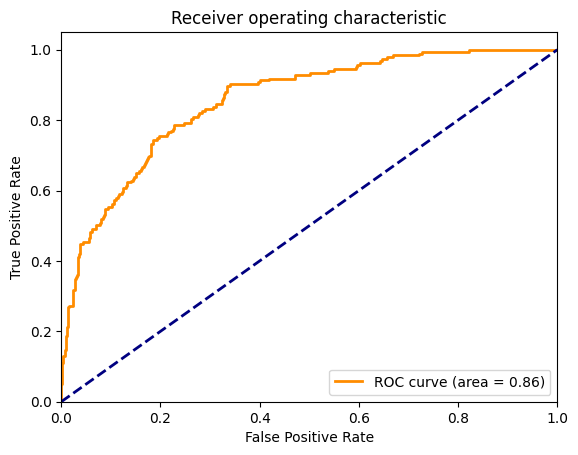

In [16]:
from sklearn.metrics import roc_curve, auc
bankloan=bankloan.assign(pred=riskmodel.predict())
fpr, tpr, thresholds = roc_curve(bankloan['DEFAULTER'], bankloan['Pred'])


ruc_auc = auc(fpr,tpr)

import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic');plt.legend(loc="lower right")
plt.show()